# Barcode Lab
### Trying to develop a barcode for PPH

In this notebook I want to develop and program a barcode for PPH in 0-homology.

### First concept:
- I want a tree made up of bars. 
- Each bar is numbered to denote the connected component. 
- On one side there is an axis / 1d grid showing the integer time steps.
- (One can switch from integer timesteps to continuous timesteps, if desired.)
- If there is a merger, the corresponding connected components merge into one branch. 
- If $\Lambda_0$ changes, this is indicated visually (maybe a horizontal line cutting the bar at this step, or a different style formatting for the bar).
- At such a change of $\Lambda_0$ also the new dimension is indicated in the barcode.

In [5]:
# let's start by drawing a bunch of equally spaced bars

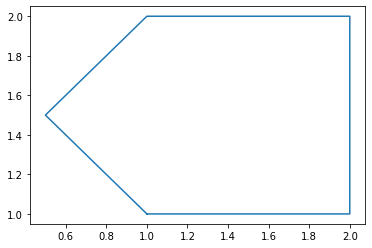

In [6]:
import matplotlib.pyplot as plt

coord = [[1,1], [2,1], [2,2], [1,2], [0.5,1.5]]
coord.append(coord[0]) #repeat the first point to create a 'closed loop'

xs, ys = zip(*coord) #create lists of x and y values

plt.figure()
plt.plot(xs,ys) 
plt.show() 

In [7]:
xs

(1, 2, 2, 1, 0.5, 1)

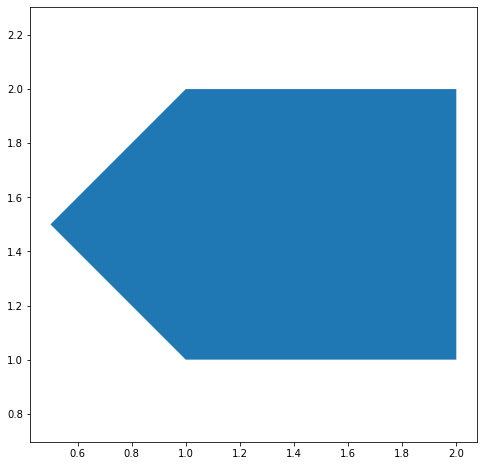

In [8]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(xs, ys)
plt.show()

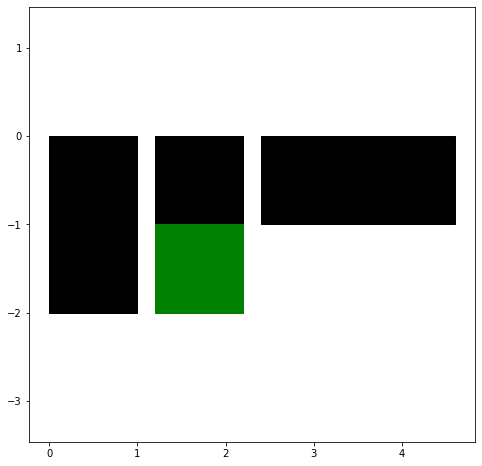

In [62]:
#def rect(num=0,step=0,width=1,length=1, spacing =  0.5, color='black'):
#    """
#    Draws rectangle for PPH bar plot. 
#    num ...    number of branch, i.e. place in horizontal direction, 
#               starting at 0, left to right
#    step ...   filtration step, i.e. place in vertical direction, 
#               starting at 0, top to bottom
#    width ...  width of each bar (also space between bars)
#    length ... duration of bar, same unit as step
#    color ...  color of the bar  
#    """
#    gap = width*spacing
#    x = (width+gap)*num
#    y = -step
#    coord = [[x,y], [x+width,y], [x+width,y-length], [x,y-length]]
#    coord.append(coord[0]) #repeat the first point to create a 'closed loop'
#
#    xs, ys = zip(*coord)
#    plt.fill(xs, ys,color=color)
    
    
def rect(grid = (1,1,0.1), x0 = 0, y0 = 0, width = 1, length = 1, color='black'):
    """
    Draws rectangle for PPH bar plot. 
    grid ... underlying grid of plot. x,y and spacing between bars in x-direction
    x0 ... left edge of bar
    y0 ... upper edge of bar
    width ...  width of each bar in grid-units (integer)
    length ... duration of bar (integer)
    color ...  color of the bar  
    """
    
    gap = grid[2]
    x_len = grid[0]
    y_len = grid[1]
    x = (x_len+gap)*x0
    y = -y0*y_len
    mult_fact = width + (width-1)*gap
    coord = [[x,y], [x+mult_fact*x_len,y], [x+mult_fact*x_len,y-length*y_len], [x,y-length*y_len]]
    coord.append(coord[0]) #repeat the first point to create a 'closed loop'

    xs, ys = zip(*coord)
    plt.fill(xs, ys,color=color)
    

plt.figure(figsize=(8, 8)) 
plt.axis('equal')
#rect(0,length=3)
#rect(1)
#rect(2)
#rect(num=1,step=1,color='green')
rect(grid=(1,1,0.2),x0=0,y0=0, length = 2)
rect(grid=(1,1,0.2),x0=1,y0=0)
rect(grid=(1,1,0.2),x0=1,y0=1,color="green")
rect(grid=(1,1,0.2),x0=2,y0=0,width=2)
plt.show()

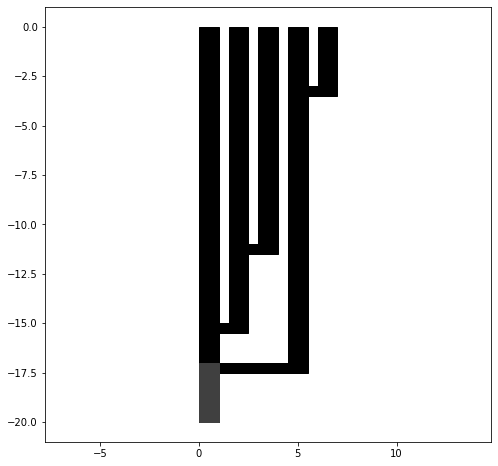

In [76]:
comps = 5
dur = 20 # duration of whole filtration
# mergers is a list of pairs (i,(j,k))
# where i is the timestep, 
# k is the component dying
# j is the component j merges into

#mergers should be ordered by timestep index i
mergers = [(3,(3,4)),(11,(1,2)), (15,(0,1)), (17,(0,3))]
colors = ['0','0.25','0.5','0.75']
life = [dur for c in range(comps)]

plt.figure(figsize=(8, 8)) 
plt.axis('equal')
color='black'
grid = (1,1,0.5)
for i,(j,k) in mergers:
    life[k] = i
    rect(grid=grid, x0=j, y0=i, length = 0.5, width = k-j+1, color=color)


# order of bars should be according to mergers
for comp in range(comps):
    #rect(comp, length = life[comp])
    rect(grid=grid, x0=comp, length = life[comp])
    

# Let's assume we have a change of dimension at step 17 for component 0
rect(grid=grid,x0=0,y0=17,length=life[0]-17,color=colors[1])
    
    

    
plt.show()

In [ ]:
# datenstruktur so, dass man nach potenz und zeitspanne filtern kann
# je nach potenz unterschiedliche dicke der balken
# je nach coeffizient label hinzufügen und ticks für den wechsel hinzufügen